In [52]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATASETS
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE CELL.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote
from urllib.error import HTTPError
from zipfile import ZipFile

print(os.getcwd())
CHUNK_SIZE = 40960
DATASET_MAPPING = 'ravdess-emotional-speech-audio:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F107620%2F256618%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230904%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230904T164817Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3c6e076a0b832fc1e24ab8ad8612a5c9a053818dac23cd90975eb78b8578a2f27a940aed451b6be434bc5497350338fdc5cf6ec8470c2e2f1723b3513e412adbed3e4df54290e044ea9959c04e312ace01581e5b13a34bb2e186ddb36a6811cd828908cbd05682656b6eac126b55da7b51a66fa4e4600165e88ed2d5119e968dcac3a257eaed9898898e82f228ed3ea39d7dc97cd46c1760dae872e24def5a85a5a8c621b57f131fce1dd0c5908b823a5a0316accd548a3f859b884ae358feb1a29883a0997c3c3f17947c17f926a92c30f67a62133197c11d2a577d9fcd5b5ad50d6b883a5f178e35c9f41e23d9f2d88fdf1f7e6700095dd745e3101be7c2a7,toronto-emotional-speech-set-tess:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F316368%2F639622%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230904%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230904T164817Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D07af030add2bb75e7e9913a3eca1c6efa6425b78f482387a3e1c1ce4c42490bd20b542e48a5bf2b0202b91f7f7406311354b9d02efa429963a5ddc87f9f64c590071b25e4ad953915bb5d2d643a0d07acb4992757770663f57bdb3c5d5a6c38a1f73f4986ac4bc4b610d066a966b569c5b8c877c0cea73b479ccf0efaaed3f6f75699724c9c0451d329c1103fffe84e812b925c7ed85ed725e2ac2754f18ea8e54376e971f2578f2f8fb345795f3567860bd6644e470cbf2052315bc1e4a6e57f9717cfca3eaf5a757f51c023b69eb94847a5e4242b900b849f7c5a5cf236a37de306b9659d4e4bf90059b6c8ca20f1b4b78ecf13507283116767e883105aee6,cremad:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F325566%2F653195%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230904%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230904T164817Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D776f8e8aa2977cb7a843340f302df3441494275db76bb6e133db099a770b212c9d2ca0a1929fda5ed8f261d237c40090d8d1d3e081c3cb68e0482b1ea874e0d79b4e9f074a7de2c990e826647bf1604de5c7898b9088041028bccc7b62d00ff0115428871b8ed6ab3024dd9c2ef13edc046bdf72e05f1a272a64baa2de3de378df4415501b81ca041db736d2b9f5af602f125d8271bb02247679f9b8d2b7d090e6043a2eb5a4a147c7628b34fdc2a48f2b812fc0f7391edf7da447d4ca4f4aca8d084cbf2660e5d8afa9b4c7adc9a1c502a78e808cbc96144d6332851cb36fab2730f23b90194b60d42b95cdd6d576eddcb62f3a5668699a36b636bb9b494869,surrey-audiovisual-expressed-emotion-savee:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F338555%2F671851%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20230904%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20230904T164817Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D787baac511eb189bb0918d0f5d6af4f2bba34cb90160de939d12f09813f49fe6088986017de2df200eb816dca1cef16db2b027d8e4e2992dc30893b398f8d242d13a77d4a1391f86c6d9b0687bacc7ddbc7b70e63cdc1b6bea99a881b2899d470a8cda68ed042523df3e8927a93fe7256ad5094a6a34887c2bd56af02bbd7531a6cbcedb335c7d90849154b003eb798997e587fe1c6e75ca6c6cce204d1de4bc1eadc33f9107584ae7558a228ce2591fce3fcf0641c0ea9853ec41a3b4fe745f380d88d3a8fb9238110ca88f9bd100f00dbc1564f101463c2cb68cbd2d49521ed68d75f163fd4c3ee4998fd66cec3249e201555f830223fbbbf334c68286e972'
KAGGLE_INPUT_PATH='/home/jupyter/imported/kaggle3/'
KAGGLE_INPUT_SYMLINK='/home/jupyter/imported/kaggler'


if os.path.exists(KAGGLE_INPUT_PATH):
    os.rmdir(KAGGLE_INPUT_PATH)  # Remove the existing directory

os.makedirs(KAGGLE_INPUT_PATH, 0o777)  # Recreate the directory

os.symlink(KAGGLE_INPUT_PATH, os.path.join('', 'input'), target_is_directory=True)
os.makedirs(KAGGLE_INPUT_SYMLINK)
os.symlink(KAGGLE_INPUT_PATH, os.path.join(KAGGLE_INPUT_SYMLINK, 'input'), target_is_directory=True)

for dataset_mapping in DATASET_MAPPING.split(','):
    directory, download_url_encoded = dataset_mapping.split(':')
    download_url = unquote(download_url_encoded)
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as zipfileres, NamedTemporaryFile() as tfile:
            total_length = zipfileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes zipped')
            dl = 0
            data = zipfileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = zipfileres.read(CHUNK_SIZE)
            print(f'\nUnzipping {directory}')
            with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue
print('Dataset import complete.')


/home/jupyter/imported


OSError: [Errno 39] Directory not empty: '/home/jupyter/imported/kaggle3/'

#  <center> Speech Emotion Recognition <center>

# Importing Libraries

In [1]:
!sudo apt-get update
!sudo apt-get install -y libsndfile1 -y
!pip install --upgrade pip
!sudo apt-get install portaudio19-dev -y

Hit:2 http://packages.cloud.google.com/apt gcsfuse-buster InRelease            
Hit:3 https://packages.cloud.google.com/apt google-compute-engine-buster-stable InRelease
Hit:4 https://packages.cloud.google.com/apt cloud-sdk-buster InRelease         
Hit:1 https://packages.cloud.google.com/apt kubernetes-xenial InRelease        
Hit:5 https://download.docker.com/linux/debian buster InRelease                
Hit:6 https://deb.debian.org/debian buster InRelease                           
Hit:7 https://deb.debian.org/debian-security buster/updates InRelease  
Hit:8 https://deb.debian.org/debian buster-updates InRelease           
Hit:9 https://deb.debian.org/debian buster-backports InRelease
Hit:10 http://ftp.de.debian.org/debian buster-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsndfile1 is already the newest version (1.0.28-6+deb10u2).
0 upgraded, 0 newly installed, 0 to remove and 10

In [2]:
!pip install librosa keras tensorflow SpeechRecognition pyaudio ipywebrtc
!pip install --upgrade librosa

In [62]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import speech_recognition as sr


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

!git clone https://github.com/raphaelvallat/entropy.git entropy/
!cd entropy/
!pip install -r requirements.txt



## Data Preparation
* As we are working with four different datasets, so i will be creating a dataframe storing all emotions of the data in dataframe with their paths.
* We will use this dataframe to extract features for our model training.

In [5]:
# Paths for data.
Ravdess = "/home/jupyter/imported/kaggler/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/home/jupyter/imported/kaggler/input/cremad/AudioWAV/"
Tess = "/home/jupyter/imported/kaggler/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/home/jupyter/imported/kaggler/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

##  <center> 1. Ravdess Dataframe <center>
Here is the filename identifiers as per the official RAVDESS website:

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4
This means the meta data for the audio file is:

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

In [51]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0    happy  /home/jupyter/imported/kaggler/input/ravdess-e...
1     fear  /home/jupyter/imported/kaggler/input/ravdess-e...
2     calm  /home/jupyter/imported/kaggler/input/ravdess-e...
3    angry  /home/jupyter/imported/kaggler/input/ravdess-e...
4    angry  /home/jupyter/imported/kaggler/input/ravdess-e...

In [52]:
data_path = Ravdess_df
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0    happy  /home/jupyter/imported/kaggler/input/ravdess-e...
1     fear  /home/jupyter/imported/kaggler/input/ravdess-e...
2     calm  /home/jupyter/imported/kaggler/input/ravdess-e...
3    angry  /home/jupyter/imported/kaggler/input/ravdess-e...
4    angry  /home/jupyter/imported/kaggler/input/ravdess-e...

## Data Visualisation and Exploration

First let's plot the count of each emotions in our dataset.

In [53]:
data_path
df = pd.read_csv('data_path.csv')

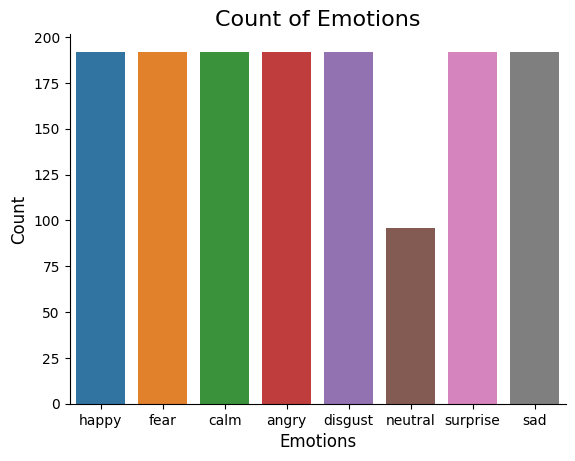

In [54]:
plt.figure(1)
plt.title('Count of Emotions', size=16)
sns.countplot(data=df, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

We can also plot waveplots and spectograms for audio signals

* Waveplots - Waveplots let us know the loudness of the audio at a given time.
* Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [55]:
pip install --upgrade librosa

Note: you may need to restart the kernel to use updated packages.


In [56]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

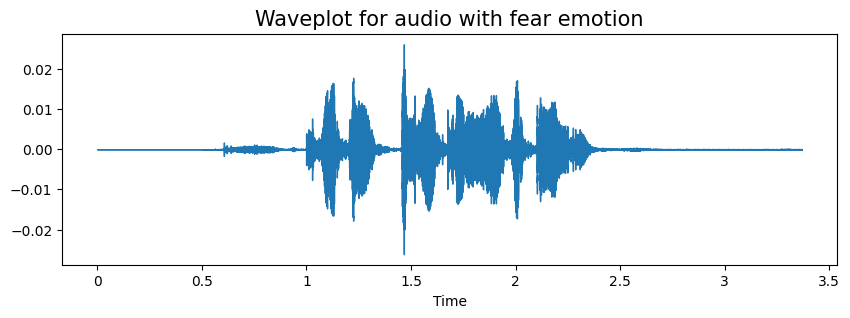

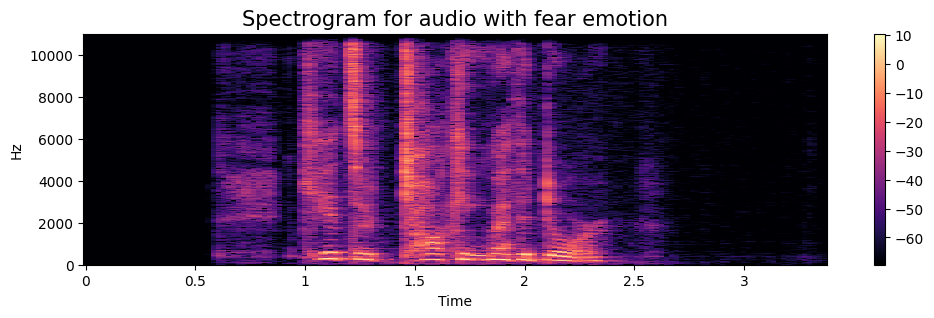

In [63]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

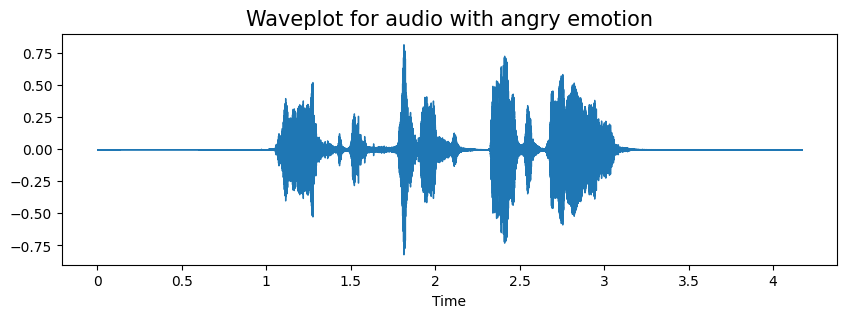

TypeError: __init__() takes 1 positional argument but 2 were given

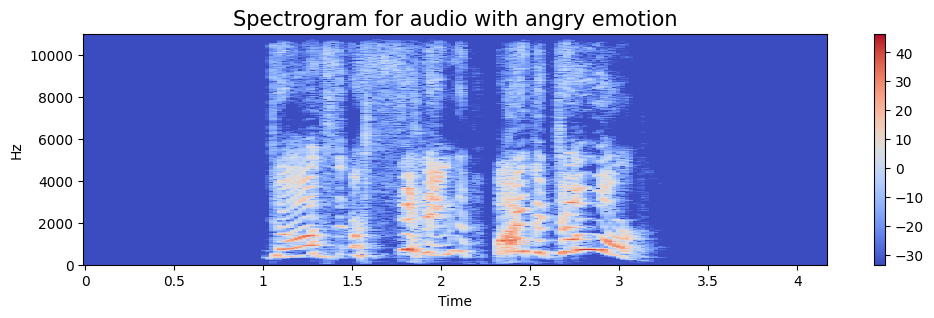

In [13]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

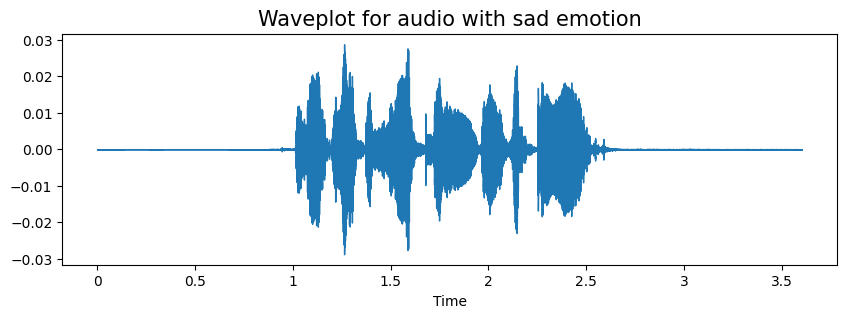

TypeError: __init__() takes 1 positional argument but 2 were given

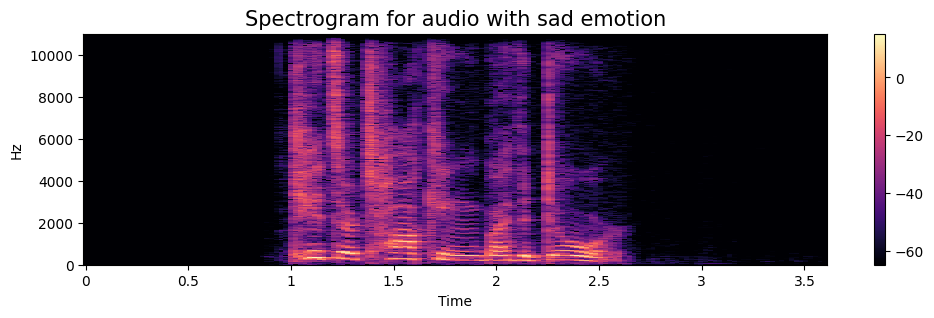

In [14]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

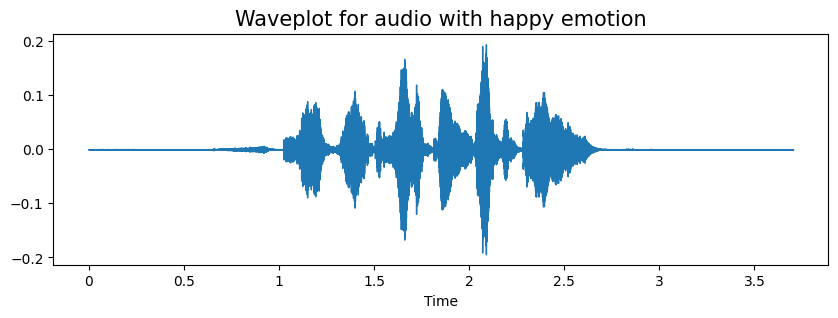

TypeError: __init__() takes 1 positional argument but 2 were given

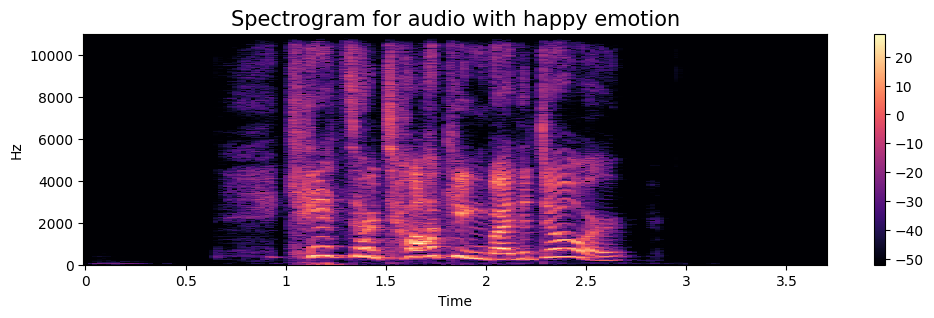

In [15]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation

- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
- To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
- The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- In order to this to work adding the perturbations must conserve the same label as the original training sample.
- In images data augmention can be performed by shifting the image, zooming, rotating ...

First, let's check which augmentation techniques works better for our dataset.

In [16]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 1. Simple Audio

TypeError: __init__() takes 1 positional argument but 2 were given

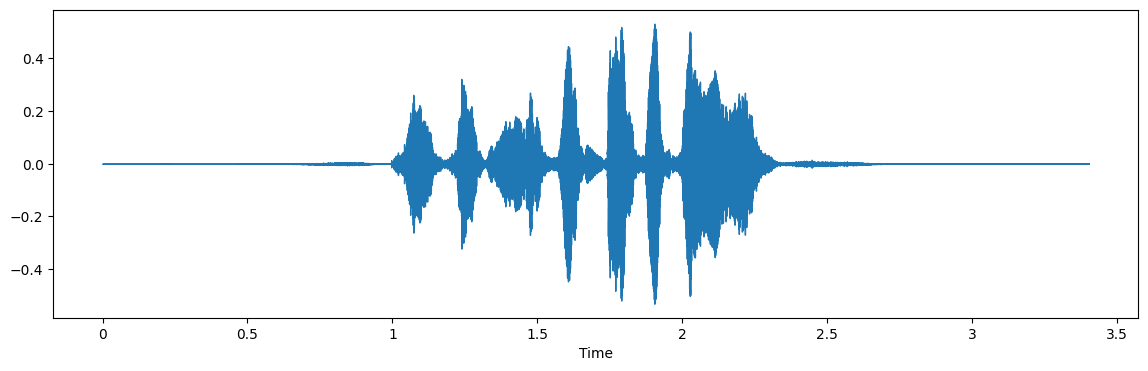

In [17]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

#### 2. Noise Injection

TypeError: __init__() takes 1 positional argument but 2 were given

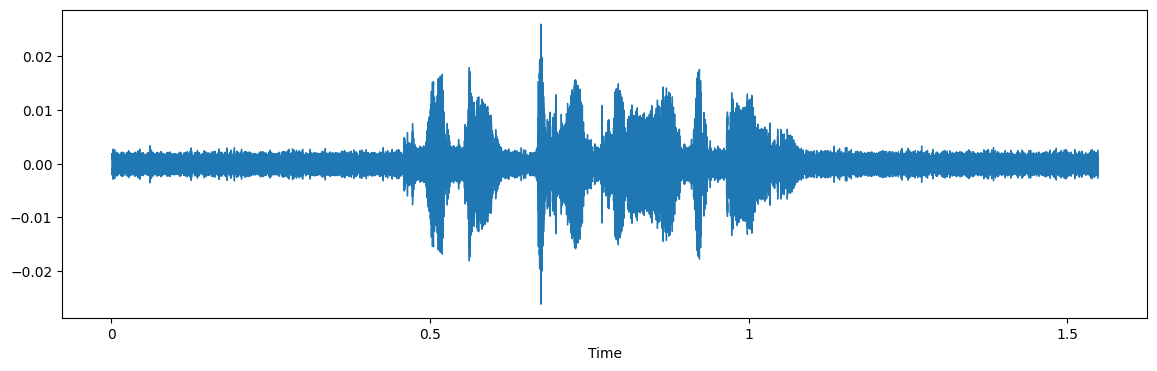

In [61]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

We can see noise injection is a very good augmentation technique because of which we can assure our training model is not overfitted

#### 3. Stretching

TypeError: __init__() takes 1 positional argument but 2 were given

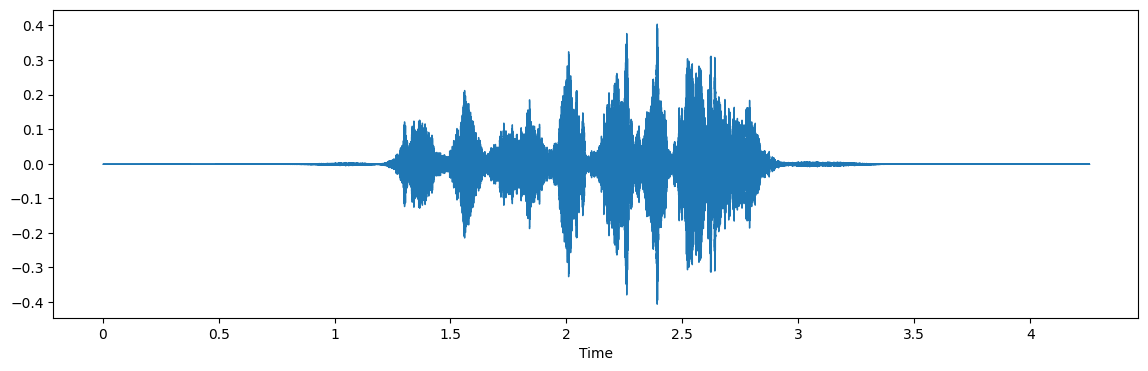

In [19]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 4. Shifting

TypeError: __init__() takes 1 positional argument but 2 were given

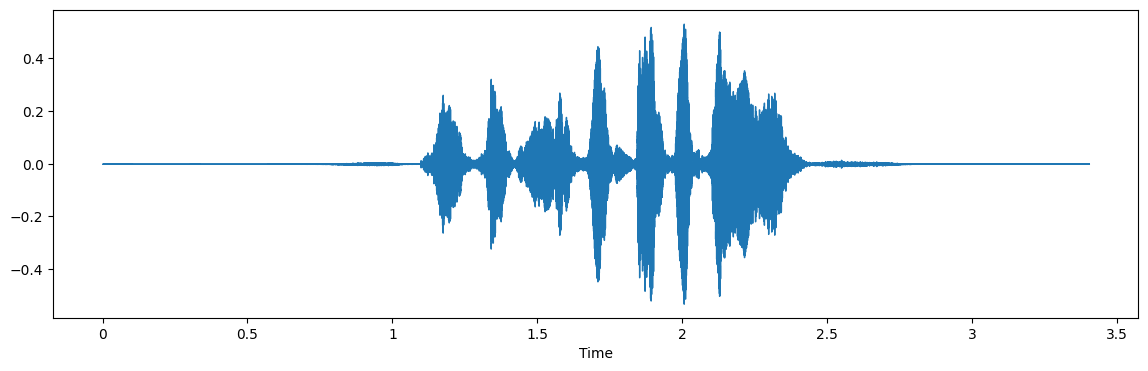

In [20]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 5. Pitch

TypeError: __init__() takes 1 positional argument but 2 were given

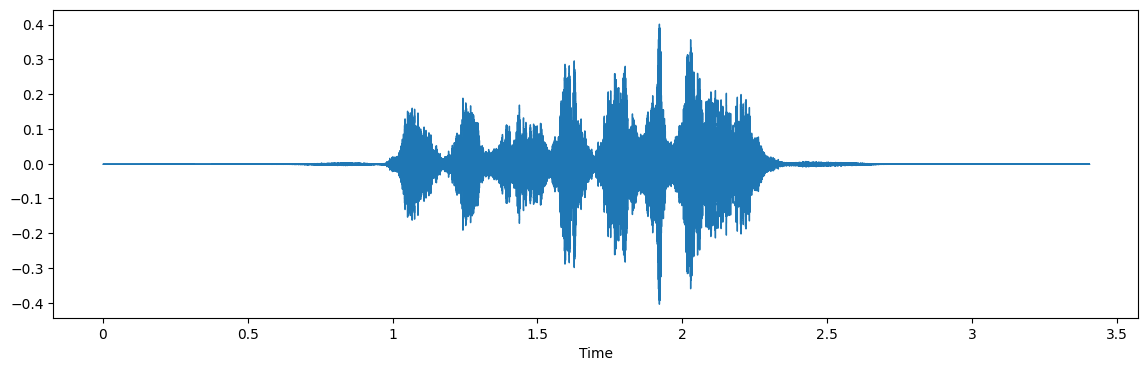

In [21]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

- From the above types of augmentation techniques i am using noise, stretching(ie. changing speed) and some pitching.

## Feature Extraction
- Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.


The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

![image.png](https://miro.medium.com/max/633/1*7sKM9aECRmuoqTadCYVw9A.jpeg)

I am no expert on audio signals and feature extraction on audio files so i need to search and found a very good blog written by [Askash Mallik](https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225) on feature extraction.

As stated there with the help of the sample rate and the sample data, one can perform several transformations on it to extract valuable features out of it.
1. Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
2. Energy : The sum of squares of the signal values, normalized by the respective frame length.
3. Entropy of Energy : The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
4. Spectral Centroid : The center of gravity of the spectrum.
5. Spectral Spread : The second central moment of the spectrum.
6. Spectral Entropy :  Entropy of the normalized spectral energies for a set of sub-frames.
7. Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
8. Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
9.  MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
10. Chroma Vector : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).
11. Chroma Deviation : The standard deviation of the 12 chroma coefficients.


In this project i am not going deep in feature selection process to check which features are good for our dataset rather i am only extracting 5 features:
- Zero Crossing Rate
- Chroma_stft
- MFCC
- RMS(root mean square) value
- MelSpectogram to train our model.

In [22]:
rms =librosa.feature.rms(y=data).T
rms.shape


#result = np.hstack((result, rms))

(147, 1)

In [23]:
def rmse(data):
    hop_length = 512
    frame_length = 1024
    n_fft = 1

    rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length, center=True)

    rmse = rmse[0]

    energy = np.array([ sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)])
   


In [24]:

def mler(rms):
    lef=0
    delta=0.06
    lowthresh=rms.mean()*delta
    for val in rms:
        lef+=np.sign(lowthresh-val)+1
    mler=lef/len(rms)
    return mler

def extract_features(data):
    # # ZCR
    result = np.array([])
    # zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    # result=np.hstack((result, zcr)) # stacking horizontally

    # #Chroma_stft
    # stft = np.abs(librosa.stft(data))
    # chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    # result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # # Root Mean Square Value
    # rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    # result = np.hstack((result, rms)) # stacking horizontally

    # # MelSpectogram
    # mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    # result = np.hstack((result, mel)) # stacking horizontally
    
    #spectral centroid
    # spec_cent=np.mean(librosa.feature.spectral_centroid(y=data, sr=sample_rate).T, axis=0)
    # result = np.hstack((result, spec_cent)) # stacking horizontally
    
    #spectral contrast
    S = np.abs(librosa.stft(data))
    contrast = np.mean(librosa.feature.spectral_contrast(S=S, sr=sample_rate).T, axis=0)
    result = np.hstack((result, contrast)) # stacking horizontally
    
    # #spectral flux
    # onset_env =np.mean( librosa.onset.onset_strength(sr=sample_rate, S=librosa.amplitude_to_db(data, ref=np.max)))
    # result=np.hstack((result,onset_env))
    
    # #mler
    # Mler=mler(rms)
    # result=np.hstack((result,Mler))
    
    # #chroma_sens
    # chroma_cens = np.mean(librosa.feature.chroma_cens(y=data, sr=sample_rate))
    # result=np.hstack((result,chroma_cens))
    
    
    #entropy
    
   # ee=np.round(ent.spectral_entropy(data, sf=100, method='fft'), 2)
    #result=np.np.hstack((result,ee))
    #rmse
    #Rmse=rmse(data)
   # result=np.hstack((result,rmse))
    #spectral roll off
    # spec_rolloff = np.mean(librosa.feature.spectral_rolloff(x, sr=sample_rate)[0])
    # result=np.hstack((result,spec_rolloff))
    
    
    
    
    
    
    
    
    
    
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [25]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

print('selesai')

selesai


In [26]:
len(X), len(Y), data_path.Path.shape
print('tt')

tt


In [27]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()


0          1          2         3          4          5  \
0 -532.767822  36.291462 -12.456414  2.393297  -9.276744 -17.012850   
1 -356.191095  17.647903  -0.834317  0.400331  -5.230869  -9.411763   
2 -583.785522  35.020390 -13.492446 -0.786872 -13.562753 -19.058945   
3 -364.746033  12.773067 -42.150997 -2.104995 -14.157268 -24.744448   
4 -219.774733  10.897316 -20.433018 -4.526120  -7.580373 -11.254852   

           6          7         8          9  ...        18         19  \
0 -12.587358 -18.308714 -7.404798 -11.611943  ... -1.445324   9.150944   
1  -8.601527  -7.210548 -7.473676  -4.585969  ...  3.124496   8.295477   
2 -16.200428 -17.727890 -7.049836 -11.879329  ...  1.936511  10.378008   
3  -5.762248 -22.255322 -6.292103  -2.842356  ... -2.185384  -3.509808   
4  -4.980663 -11.131343 -5.698030  -3.195284  ... -2.572129  -3.080497   

          20         21         22         23         24         25  \
0  16.630284  18.443707  18.893920  16.697356  18.177654  18.185857   
1  11.545396  16.139030  16.693034  14.691947  15.512962  14.875659   
2  17.414601  19.418309  20.438080  17.985310  19.355748  19.596703   
3  13.989832  13.067146  19.922791  17.790306  18.647299  21.022118   
4  10.412278  11.262701  17.506226  15.653675  16.874115  15.998954   

          26  labels  
0  42.991717   happy  
1  14.399097   happy  
2  46.024076   happy  
3  45.660267    fear  
4  13.944303    fear  

[5 rows x 28 columns]

* We have applied data augmentation and extracted the features for each audio files and saved them.

## Data Preparation

- As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [28]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [29]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [30]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 27), (3240, 8), (1080, 27), (1080, 8))

In [31]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 27), (3240, 8), (1080, 27), (1080, 8))

In [32]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 27, 1), (3240, 8), (1080, 27, 1), (1080, 8))

## Modelling

Model 1 : 1D CNN(256,3 layer)

In [33]:
model1= Sequential()
model1.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model1.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model1.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model1.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model1.add(Dropout(0.2))

model1.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model1.add(Flatten())
model1.add(Dense(units=64, activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(units=32, activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(units=8, activation='softmax'))
model1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model1.summary()

2023-09-06 09:10:28.463021: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-06 09:10:28.463261: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-06 09:10:28.463317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (skripsi-galih-audio-emotion-detection-september): /proc/driver/nvidia/version does not exist
2023-09-06 09:10:28.463878: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 27, 256)           1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 256)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 128)            163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 128)           0

In [34]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)
history=model1.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
51/51 [==============================] - 6s 87ms/step - loss: 2.0599 - accuracy: 0.1423 - val_loss: 2.0104 - val_accuracy: 0.1593 - lr: 0.0010
Epoch 2/100
51/51 [==============================] - 4s 81ms/step - loss: 2.0111 - accuracy: 0.1988 - val_loss: 1.9393 - val_accuracy: 0.2528 - lr: 0.0010
Epoch 3/100
51/51 [==============================] - 4s 84ms/step - loss: 1.9280 - accuracy: 0.2346 - val_loss: 1.8558 - val_accuracy: 0.2843 - lr: 0.0010
Epoch 4/100
51/51 [==============================] - 4s 87ms/step - loss: 1.8482 - accuracy: 0.2713 - val_loss: 1.8175 - val_accuracy: 0.2917 - lr: 0.0010
Epoch 5/100
51/51 [==============================] - 4s 83ms/step - loss: 1.7688 - accuracy: 0.3204 - val_loss: 1.7038 - val_accuracy: 0.3741 - lr: 0.0010
Epoch 6/100
51/51 [==============================] - 4s 82ms/step - loss: 1.6712 - accuracy: 0.3562 - val_loss: 1.6144 - val_accuracy: 0.3815 - lr: 0.0010
Epoch 7/100
51/51 [==============================] - 5s 97ms/step - lo

In [35]:
model2 = Sequential()
model2.add(Conv1D(32, 3, activation="relu", padding="same", input_shape=( x_train.shape[1],1)))
model2.add(MaxPooling1D(2))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(8, activation="softmax"))

# Compile the model
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model2.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test))

Epoch 1/100
102/102 [==============================] - 2s 7ms/step - loss: 1.8882 - accuracy: 0.2713 - val_loss: 1.7219 - val_accuracy: 0.3741
Epoch 2/100
102/102 [==============================] - 1s 5ms/step - loss: 1.6193 - accuracy: 0.4012 - val_loss: 1.5180 - val_accuracy: 0.4370
Epoch 3/100
102/102 [==============================] - 1s 5ms/step - loss: 1.4776 - accuracy: 0.4543 - val_loss: 1.4077 - val_accuracy: 0.5046
Epoch 4/100
102/102 [==============================] - 1s 5ms/step - loss: 1.4072 - accuracy: 0.4772 - val_loss: 1.3477 - val_accuracy: 0.5148
Epoch 5/100
102/102 [==============================] - 1s 5ms/step - loss: 1.3660 - accuracy: 0.4852 - val_loss: 1.3081 - val_accuracy: 0.5343
Epoch 6/100
102/102 [==============================] - 1s 5ms/step - loss: 1.3028 - accuracy: 0.5114 - val_loss: 1.2627 - val_accuracy: 0.5370
Epoch 7/100
102/102 [==============================] - 1s 5ms/step - loss: 1.2634 - accuracy: 0.5355 - val_loss: 1.2658 - val_accuracy: 0.5185

34/34 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.7787
Accuracy of our model on test data :  77.87036895751953 %


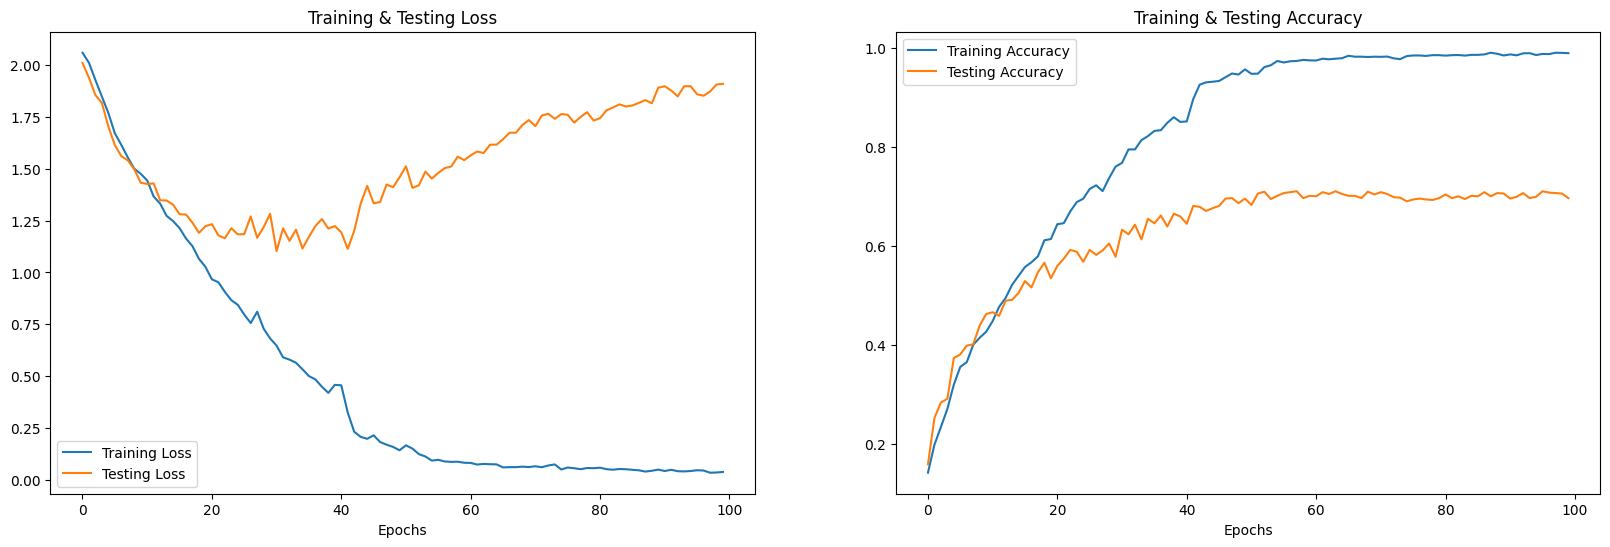

In [38]:
print("Accuracy of our model on test data : " , model2.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [65]:
#zidane testing
!pip install soundfile

# Define the path to your audio file
path_zidane = "record_out.wav"  # Replace with the actual path to your audio file

# Read the audio file
data, sample_rate = sf.read(path_zidane)

# Play the audio
Audio(data, rate=sample_rate)

In [ ]:
X, Y = [], []

for data, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(data)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
        
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features2.csv', index=False)
Features.head()

# testtt = model2.predict(data)
# testtt.flatten()
# df.head(10)

In [39]:
# predicting on test data.
pred_test = model2.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

[[[-1.99560005]
  [ 0.95280158]
  [ 1.90108027]
  ...
  [-0.95879718]
  [-0.76284715]
  [ 0.58690099]]

 [[ 0.25109138]
  [-0.5958326 ]
  [-0.33773261]
  ...
  [ 0.03787791]
  [ 0.67214048]
  [ 0.80727896]]

 [[ 0.79774674]
  [-0.96718937]
  [ 1.03445608]
  ...
  [-1.47676285]
  [-1.6448373 ]
  [-1.43943003]]

 ...

 [[ 1.23435493]
  [-1.27272498]
  [ 0.54422375]
  ...
  [-1.5391194 ]
  [-1.50216213]
  [-1.45133168]]

 [[ 0.4375511 ]
  [-0.9449757 ]
  [ 0.00761657]
  ...
  [-0.85967278]
  [-0.81010647]
  [-1.39715887]]

 [[ 0.11900862]
  [ 0.63098267]
  [-0.54713121]
  ...
  [ 0.33995217]
  [ 0.04672262]
  [ 0.64675037]]]
34/34 [==============================] - 0s 2ms/step


In [40]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0             calm          calm
1             fear          fear
2             calm          calm
3            happy         happy
4             calm          calm
5            angry         angry
6            angry         angry
7          disgust         angry
8         surprise      surprise
9             fear          fear

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

- We can see our model is more accurate in predicting surprise, angry emotions and it makes sense also because audio files of these emotions differ to other audio files in a lot of ways like pitch, speed etc..
- We overall achieved 79% accuracy on our test data and its decent but we can improve it more by applying more augmentation techniques and using other feature extraction methods.